# Lisbon buildings

In [1]:
# import libraries
import geopandas as gp
import pandas as pd
import warnings
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import os
from scipy import stats
warnings.simplefilter('ignore')

# import local functions
path_to_functions = 'C:/Users/Zaca/Documents/GitHub/useful-functions/'
sys.path.append(path_to_functions)
from plotting import default_plot, get_colors, truncate_colormap

# filepaths
buildings_file = 'C:/Users/Zaca/Documents/Datasets/portugal/gis_osm_buildings_a_free_1.shp'
freguesias_file = 'C:/Users/Zaca/Documents/Datasets/shapefiles/lisbon/freguesias.shp'
alvaras_file = 'C:/Users/Zaca/Documents/Datasets/lisbon/alvaras/alvaras.shp'
reviews_file = 'C:/Users/Zaca/Documents/Datasets/airbnb/lisbon/reviews.csv'
listings_file = 'C:/Users/Zaca/Documents/Datasets/airbnb/lisbon/listings.csv'
rendas_file = 'C:/Users/Zaca/Documents/Datasets/rendas-freguesias-2017-2019.csv'

In [2]:
# matplotlib formatting
small = 10
medium = 12
large = 12

plt.rc('font', size=small)         # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=small)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)   # fontsize of the tick labels
plt.rc('ytick', labelsize=small)   # fontsize of the tick labels
plt.rc('legend', fontsize=small)   # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5

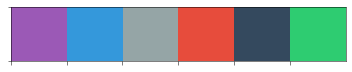

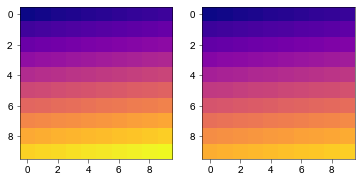

In [8]:
# some of my favorite colors
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

cmap = plt.get_cmap('plasma')
new_cmap = truncate_colormap(cmap, 0, .9, reverse=False)

# Data cleaning

In [3]:
# all buildings in portugal
buildings = gp.read_file(buildings_file)

# city limits and subdivisions of lisbon
freguesias = gp.read_file(freguesias_file)

# construction permits
alvaras = gp.read_file(alvaras_file)

In [4]:
# buildings
# filter out all non-lisbon buildings
buildings = buildings[buildings['geometry'].centroid.within(freguesias.unary_union)]

# project coordinates
buildings = buildings.to_crs('EPSG:3763')

In [5]:
# freguesias
# project coordinates
freguesias = freguesias.to_crs('EPSG:3763')

In [6]:
# alvarás
# filter out entries that are only changes to a construction already in progress
alvaras = alvaras[alvaras['OP_URBANIS'] != 'Alteração Durante a Execução da Obra']
alvaras = alvaras[alvaras['PROCEDIMEN'] == 'Licença']

# dates to datetime
alvaras['DATA_ENTRA'] = pd.to_datetime(alvaras['DATA_ENTRA'])

# slice to get exactly 10 years
alvaras = alvaras[(alvaras['DATA_ENTRA'] > '2009-05-30') & (alvaras['DATA_ENTRA'] <= '2019-05-30')]

# project coordinates
alvaras = alvaras.to_crs('EPSG:3763')

# Plotting

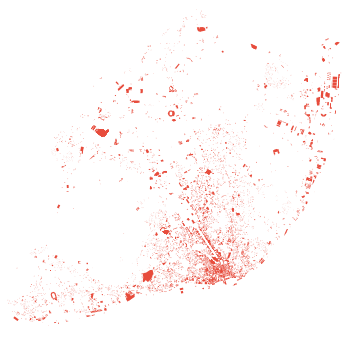

In [11]:
#base = lisbon.plot(, facecolor='none', edgecolor='k', lw=.25)
base = buildings.plot(figsize=(6, 6), facecolor='none', edgecolor='none', alpha=1)
alvaras.plot(ax=base, facecolor=flatui[3], edgecolor='k', alpha=1, lw=.25)
base.axis('off');
base.margins(0)
base.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.savefig('figures/alvaras.png', dpi=100, bbox_inches='tight', pad_inches=0)